## Activation Function Comparison using Perceptron (Binary Classification with Decision Boundary Visualization)

Training Perceptron with activation: linear


C:\Users\punny\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4972/4972 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


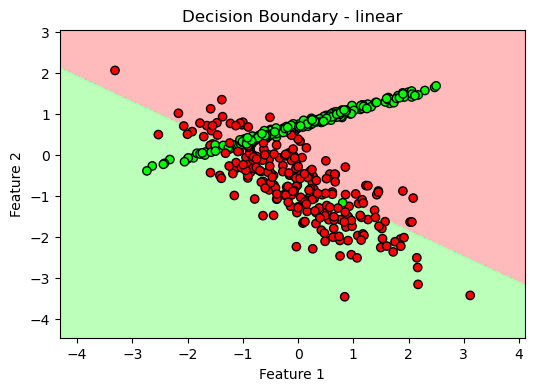

Training Perceptron with activation: sigmoid
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


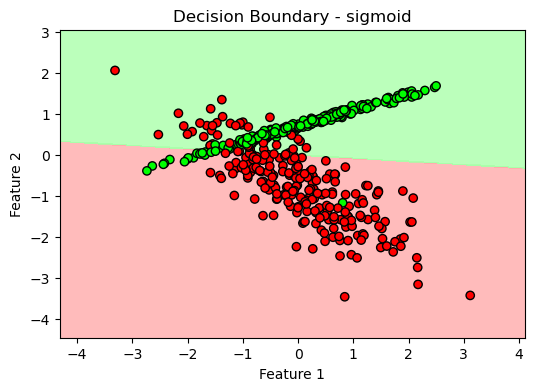

Training Perceptron with activation: tanh
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


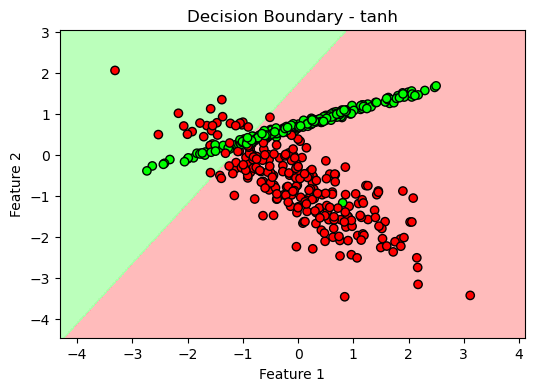

Training Perceptron with activation: relu
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


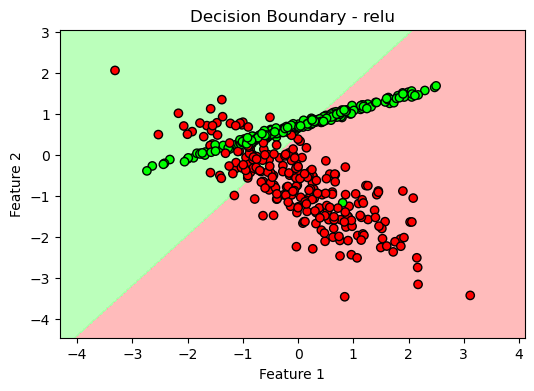

In [28]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification           # For synthetic dataset
from sklearn.model_selection import train_test_split       # To split data into train/test
from sklearn.preprocessing import StandardScaler           # For feature scaling
from tensorflow.keras.models import Sequential             # To build sequential neural network
from tensorflow.keras.layers import Dense                  # Dense layer for perceptron
from matplotlib.colors import ListedColormap               # For custom color maps in plots

# Generate synthetic binary classification dataset
X, y = make_classification(
    n_samples=500,            # Total samples
    n_features=2,             # Only 2 features for easy visualization
    n_redundant=0,            # No redundant features
    n_informative=2,          # Both features are informative
    n_clusters_per_class=1,   # Simpler clusters per class
    random_state=42           # For reproducibility
)

# Normalize features using standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot decision boundary of the trained model
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict class for each point in the mesh grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = (Z > 0.5).astype(int).reshape(xx.shape)  # Convert probabilities to class labels

    # Plot decision surface
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']), alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00']))
    plt.title(f"Decision Boundary - {title}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Activation functions to test
activations = ['linear', 'sigmoid', 'tanh', 'relu']

# Train and visualize for each activation function
for activation in activations:
    print(f"Training Perceptron with activation: {activation}")
    model = Sequential()
    model.add(Dense(1, input_dim=2, activation=activation))  # Single-layer perceptron
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=50, verbose=0)

    # Plot the decision boundary for current activation
    plot_decision_boundary(model, X, y, activation)


## Multiclass Classification on Iris Dataset using a Neural Network

In [33]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the Iris dataset
iris = load_iris()
x = iris.data                      # Features: 4 numeric measurements (sepal/petal length/width)
y = iris.target.reshape(-1, 1)     # Target labels: reshape to column vector for one-hot encoding

# One-hot encode the class labels (0, 1, 2 → [1,0,0], [0,1,0], [0,0,1])
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x, y_encoded, test_size=0.2, random_state=42
)

# Standardize the features (mean = 0, std = 1)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)   # Fit on training data
x_test = scaler.transform(x_test)         # Use transform only to avoid data leakage

# Build a simple neural network using Keras Sequential API
model = Sequential([
    Dense(10, activation='relu', input_shape=(x_train.shape[1],)),  # Hidden layer with 10 units and ReLU
    Dense(3, activation='softmax')                                   # Output layer for 3 classes (softmax)
])

# Compile the model with optimizer, loss function, and evaluation metric
model.compile(
    optimizer='adam',                          # Adaptive optimizer
    loss='categorical_crossentropy',           # Suitable for multi-class classification
    metrics=['accuracy']                       # Track accuracy during training
)

# Train the model for 50 epochs with a batch size of 8
model.fit(x_train, y_train, epochs=50, batch_size=8, verbose=1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


Epoch 1/50


C:\Users\punny\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1992 - loss: 1.2530
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3661 - loss: 1.1740
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4902 - loss: 1.0979
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5620 - loss: 1.0383
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6121 - loss: 0.9765
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6170 - loss: 0.9212 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6350 - loss: 0.8743
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5704 - loss: 0.8352
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7873 - loss: 0.7585
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8209 - loss: 0.7231
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8509 - loss: 0.7107
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8029 - loss: 0.6863

## Simple neural network with 2 layers

In [35]:
# Import required libraries from TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import NumPy to create input/output arrays
import numpy as np

# Sample input (X) and output (y) data
# This is a simple identity relationship: 0 -> 0, 1 -> 1
x = np.array([[0.0], [1.0]])
y = np.array([[0.0], [1.0]])

# Build the model using the Sequential API
model = Sequential([
    Dense(2, activation='sigmoid', input_shape=(1,)),  # First hidden layer with 2 neurons
    Dense(1, activation='sigmoid')                     # Output layer with sigmoid activation
])

# Compile the model
model.compile(
    optimizer='sgd',                    # Stochastic Gradient Descent (SGD) optimizer
    loss='binary_crossentropy',        # Suitable loss function for binary classification
    metrics=['accuracy']               # Track accuracy as an evaluation metric
)

# Train the model
model.fit(x, y, epochs=100, verbose=0)  # Train for 100 epochs, suppress output with verbose=0

# Evaluate the model on the same training data
loss, accuracy = model.evaluate(x, y)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Make predictions using the trained model
predictions = model.predict(x)
print("Predictions:\n", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.5000 - loss: 0.7786
Loss: 0.7786, Accuracy: 0.5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Predictions:
 [[0.6322874]
 [0.5730753]]


## Binary Classification with 3 Features Using a Neural Network

In [37]:
# Import necessary libraries from Keras and NumPy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Step 1: Define Input Features
# X contains 4 samples with 3 features each
X = np.array([
    [0.0, 1.0, 0.5],
    [1.0, 0.0, 0.2],
    [1.0, 1.0, 0.8],
    [0.0, 0.0, 0.0]
])

# Step 2: Define Binary Labels (0 or 1)
y = np.array([[1], [0], [1], [0]])

# Step 3: Build a Sequential Neural Network Model
model = Sequential([
    Dense(4, activation='relu', input_shape=(3,)),  # Hidden layer with 4 neurons, ReLU activation
    Dense(1, activation='sigmoid')                  # Output layer with sigmoid for binary output
])

# Step 4: Compile the Model
model.compile(
    optimizer='adam',                 # Adaptive Moment Estimation optimizer
    loss='binary_crossentropy',      # Binary crossentropy for binary classification
    metrics=['accuracy']             # Track accuracy
)

# Step 5: Train the Model
model.fit(X, y, epochs=100, verbose=0)  # Train for 100 epochs, no verbose output

# Step 6: Make Predictions
predictions = model.predict(X)
print("Predictions:\n", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Predictions:
 [[0.38063264]
 [0.5521833 ]
 [0.45215434]
 [0.5202956 ]]


## Forward Propagation in a Simple Neural Network(Manual Implementation)

In [42]:
import numpy as np

# Define ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Define Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Step 1: Create synthetic data (1 sample with 3 features)
X = np.array([[0.5, -1.2, 3.3]])  # Shape: (1, 3)

# Step 2: Initialize weights and biases

# Weights from input to hidden layer: 3 inputs → 2 neurons
W1 = np.array([
    [0.2, -0.5],
    [0.1,  0.3],
    [-0.3, 0.8]
])  # Shape: (3, 2)

# Bias for hidden layer (2 neurons)
b1 = np.array([[0.0, 0.0]])  # Shape: (1, 2)

# Weights from hidden layer to output layer: 2 → 1
W2 = np.array([
    [0.7],
    [-1.1]
])  # Shape: (2, 1)

# Bias for output neuron
b2 = np.array([[0.0]])  # Shape: (1, 1)

# Step 3: Forward pass
z1 = np.dot(X, W1) + b1        # Linear transformation for hidden layer
a1 = relu(z1)                  # Apply ReLU activation

z2 = np.dot(a1, W2) + b2       # Linear transformation for output layer
a2 = sigmoid(z2)               # Apply Sigmoid activation

# Step 4: Print results
print("Input X:", X)
print("Hidden Layer Output (ReLU):", a1)
print("Output Layer Output (Sigmoid):", a2)


Input X: [[ 0.5 -1.2  3.3]]
Hidden Layer Output (ReLU): [[0.   2.03]]
Output Layer Output (Sigmoid): [[0.09682597]]




# 1. **ReLU (Rectified Linear Unit)**
def relu(x):
    return np.maximum(0, x)

# 2. **Sigmoid**
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 3. **Sign Function**
def sign(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))

# 4. **Step Function**
def step(x):
    return np.where(x >= 0, 1, 0)

# 5. **Tanh (Hyperbolic Tangent)**
def tanh(x):
    return np.tanh(x)

# 6. **Softmax**
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # for numerical stability
    return e_x / np.sum(e_x, axis=-1, keepdims=True)


## Forward Propagation in a Neural Network with Tanh and Softmax Activations

In [46]:
import numpy as np

# Define tanh activation for hidden layer
def tanh(x):
    return np.tanh(x)

# Define softmax for output layer (multi-class probabilities)
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # stability trick
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

# Input data: 2 samples with 2 features each
X = np.array([[1.0, -0.5],
              [-1.5, 2.0]])      # Shape: (2, 2)

# Weights from input to hidden (2 inputs → 3 neurons)
W1 = np.array([
    [0.1, -0.3, 0.5],
    [0.4, 0.2, -0.6]
])  # Shape: (2, 3)

# Bias for hidden layer
b1 = np.array([[0.0, 0.0, 0.0]])  # Shape: (1, 3)

# Weights from hidden to output (3 → 2 outputs)
W2 = np.array([
    [0.2, -0.1],
    [-0.4, 0.3],
    [0.1, 0.5]
])  # Shape: (3, 2)

# Bias for output layer
b2 = np.array([[0.0, 0.0]])  # Shape: (1, 2)

# Step 1: Forward pass to hidden layer
z1 = np.dot(X, W1) + b1      # Linear transformation
a1 = tanh(z1)                # Non-linear activation

# Step 2: Forward pass to output layer
z2 = np.dot(a1, W2) + b2     # Linear transformation
a2 = softmax(z2)             # Convert to class probabilities

# Output results
print("Input:\n", X)
print("Hidden Layer Output (tanh):\n", a1)
print("Output Probabilities (softmax):\n", a2)


Input:
 [[ 1.  -0.5]
 [-1.5  2. ]]
Hidden Layer Output (tanh):
 [[-0.09966799 -0.37994896  0.66403677]
 [ 0.57166997  0.69106947 -0.96031939]]
Output Probabilities (softmax):
 [[0.49261283 0.50738717]
 [0.5179623  0.4820377 ]]


## Activation Functions Visualization 

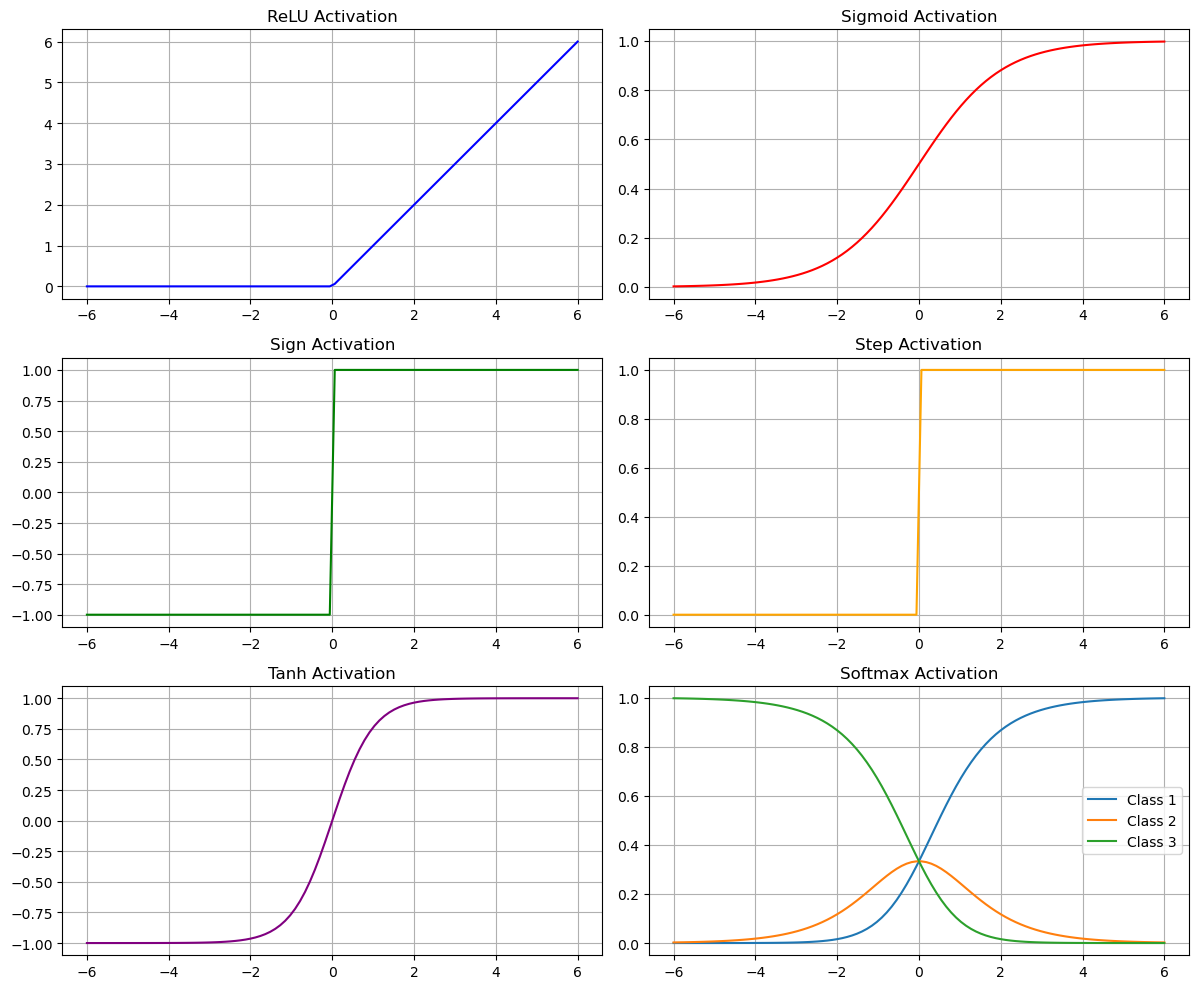

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Define Activation Functions
# ------------------------------

# ReLU: Rectified Linear Unit
def relu(x):
    return np.maximum(0, x)

# Sigmoid: S-shaped curve from 0 to 1
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sign function: -1, 0, or 1
def sign(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))

# Step function: 0 or 1 based on sign
def step(x):
    return np.where(x >= 0, 1, 0)

# Tanh: Hyperbolic tangent function, outputs between -1 and 1
def tanh(x):
    return np.tanh(x)

# Softmax: Converts logits into class probabilities
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # Numerical stability
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

# ------------------------------
# Input range for plotting
# ------------------------------

x = np.linspace(-6, 6, 100)  # Generate 100 values from -6 to 6

# Compute each activation function's output
relu_output = relu(x)
sigmoid_output = sigmoid(x)
sign_output = sign(x)
step_output = step(x)
tanh_output = tanh(x)

# Softmax: Simulate 3-class logits for each x
logits = np.stack([x, np.zeros_like(x), -x], axis=1)
softmax_output = softmax(logits)

# ------------------------------
# Plotting all activation functions
# ------------------------------

plt.figure(figsize=(12, 10))  # Create a figure with custom size

# ReLU
plt.subplot(3, 2, 1)
plt.plot(x, relu_output, color='blue')
plt.title("ReLU Activation")
plt.grid(True)

# Sigmoid
plt.subplot(3, 2, 2)
plt.plot(x, sigmoid_output, color='red')
plt.title("Sigmoid Activation")
plt.grid(True)

# Sign
plt.subplot(3, 2, 3)
plt.plot(x, sign_output, color='green')
plt.title("Sign Activation")
plt.grid(True)

# Step
plt.subplot(3, 2, 4)
plt.plot(x, step_output, color='orange')
plt.title("Step Activation")
plt.grid(True)

# Tanh
plt.subplot(3, 2, 5)
plt.plot(x, tanh_output, color='purple')
plt.title("Tanh Activation")
plt.grid(True)

# Softmax (for 3 classes)
plt.subplot(3, 2, 6)
plt.plot(x, softmax_output[:, 0], label='Class 1')
plt.plot(x, softmax_output[:, 1], label='Class 2')
plt.plot(x, softmax_output[:, 2], label='Class 3')
plt.title("Softmax Activation")
plt.legend()
plt.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()


In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# -----------------------------
# Step 1: Define the input and output data
# -----------------------------

# Input features: 2 samples with 1 feature each
x = np.array([[0.0], [1.0]])

# Target labels: same as input (identity function)
y = np.array([[0.0], [1.0]])

# -----------------------------
# Step 2: Build the neural network model
# -----------------------------

# Create a Sequential model with two Dense layers
model = Sequential([
    # First hidden layer: 2 neurons, sigmoid activation, input has 1 feature
    Dense(2, activation='sigmoid', input_shape=(1,)),
    
    # Output layer: 1 neuron (binary output), sigmoid activation
    Dense(1, activation='sigmoid')
])

# -----------------------------
# Step 3: Compile the model
# -----------------------------

# Using stochastic gradient descent (SGD) optimizer
# Using binary crossentropy as the loss function for binary classification
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------
# Step 4: Train the model
# -----------------------------

# Train the model for 100 epochs with no training output
model.fit(x, y, epochs=100, verbose=0)

# -----------------------------
# Step 5: Evaluate the model
# -----------------------------

# Evaluate on the same training data
loss, acc = model.evaluate(x, y)

# Print the loss and accuracy
print(f"Loss: {loss:.4f}, Accuracy: {acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.5000 - loss: 0.7211
Loss: 0.7211, Accuracy: 0.5000


In [53]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Step 1: Load and preprocess the data
# -----------------------------

# Load the breast cancer dataset from sklearn
data = load_breast_cancer()
x = data.data        # Features
y = data.target      # Labels (0: malignant, 1: benign)

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)  # Use transform (not fit_transform) on test data

# -----------------------------
# Step 2: Build the model
# -----------------------------

# Create a Sequential neural network model
model = Sequential([
    # First hidden layer: 64 units, ReLU activation, L2 regularization
    Dense(64, activation='relu', input_shape=(x_train.shape[1],),
          kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Dropout layer with 50% rate

    # Second hidden layer: 32 units, ReLU activation, L2 regularization
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),  # Dropout layer with 30% rate

    # Output layer: 1 neuron, sigmoid activation (binary classification)
    Dense(1, activation='sigmoid')
])

# -----------------------------
# Step 3: Compile the model
# -----------------------------

# Use Adam optimizer and binary crossentropy loss for binary classification
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# Step 4: Train the model
# -----------------------------

# Train the model with validation split of 20% from training data
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# -----------------------------
# Step 5: Evaluate the model
# -----------------------------

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)

# Print the test performance
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/50


C:\Users\punny\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5561 - loss: 1.5774 - val_accuracy: 0.9121 - val_loss: 1.2474
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7735 - loss: 1.2847 - val_accuracy: 0.9451 - val_loss: 1.1031
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8503 - loss: 1.1812 - val_accuracy: 0.9451 - val_loss: 1.0134
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8818 - loss: 1.0867 - val_accuracy: 0.9451 - val_loss: 0.9466
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9318 - loss: 0.9668 - val_accuracy: 0.9670 - val_loss: 0.8901
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9375 - loss: 0.9370 - val_accuracy: 0.9670 - val_loss: 0.8413
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9450 - loss: 0.8508 - val_accuracy: 0.9670 - val_loss: 0.7979
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9390 - loss: 0.8418 - val_accuracy: 0.9670 - val_loss: 0.

In [55]:
# -----------------------------
# Import Required Libraries
# -----------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# -----------------------------
# Load and Preprocess the Data
# -----------------------------
# Load Breast Cancer dataset
data = load_breast_cancer()
x = data.data        # Input features
y = data.target      # Labels (0: malignant, 1: benign)

# Split data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

# Standardize input features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# -----------------------------
# Build the Neural Network Model
# -----------------------------
model = Sequential([
    # First hidden layer with L2 regularization, batch norm, and dropout
    Dense(64, activation='relu', input_shape=(x_train.shape[1],),
          kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    # Second hidden layer
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])

# -----------------------------
# Compile the Model
# -----------------------------
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# -----------------------------
# Early Stopping Callback
# -----------------------------
early_stop = EarlyStopping(
    monitor='val_loss',       # Monitor validation loss
    patience=5,               # Stop after 5 epochs of no improvement
    restore_best_weights=True  # Restore best weights after stopping
)

# -----------------------------
# Train the Model
# -----------------------------
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# -----------------------------
# Evaluate the Model
# -----------------------------
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# -----------------------------
# Predict on Test Set
# -----------------------------
y_pred_prob = model.predict(x_test)                        # Probabilities
y_pred = (y_pred_prob > 0.5).astype('int32').flatten()     # Convert to class labels (0 or 1)

# -----------------------------
# Model Evaluation Metrics
# -----------------------------
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}")


Epoch 1/50


C:\Users\punny\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.6695 - loss: 1.5598 - val_accuracy: 0.8791 - val_loss: 1.2602
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7660 - loss: 1.3204 - val_accuracy: 0.9231 - val_loss: 1.1346
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8723 - loss: 1.1286 - val_accuracy: 0.9341 - val_loss: 1.0569
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9009 - loss: 1.0306 - val_accuracy: 0.9341 - val_loss: 1.0043
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8894 - loss: 1.0161 - val_accuracy: 0.9341 - val_loss: 0.9618
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9378 - loss: 0.9136 - val_accuracy: 0.9341 - val_loss: 0.9266
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9495 - loss: 0.8856 - val_accuracy: 0.9341 - val_loss: 0.8962
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9140 - loss: 0.9035 - val_accuracy: 0.9231 - val_loss: 0.

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8040 - loss: 0.6894 - val_accuracy: 0.9483 - val_loss: 0.1842
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9512 - loss: 0.1683 - val_accuracy: 0.9619 - val_loss: 0.1340
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9687 - loss: 0.1074 - val_accuracy: 0.9643 - val_loss: 0.1216
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9768 - loss: 0.0795 - val_accuracy: 0.9685 - val_loss: 0.1065
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9819 - loss: 0.0607 - val_accuracy: 0.9712 - val_loss: 0.0945
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9879 - loss: 0.0427 - val_accuracy: 0.9732 - val_loss: 0.0935
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9890 - loss: 0.0363 - val_accuracy: 0.9729 - val_loss: 0.0925
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9921 - loss: 0.0281 - val_accuracy:

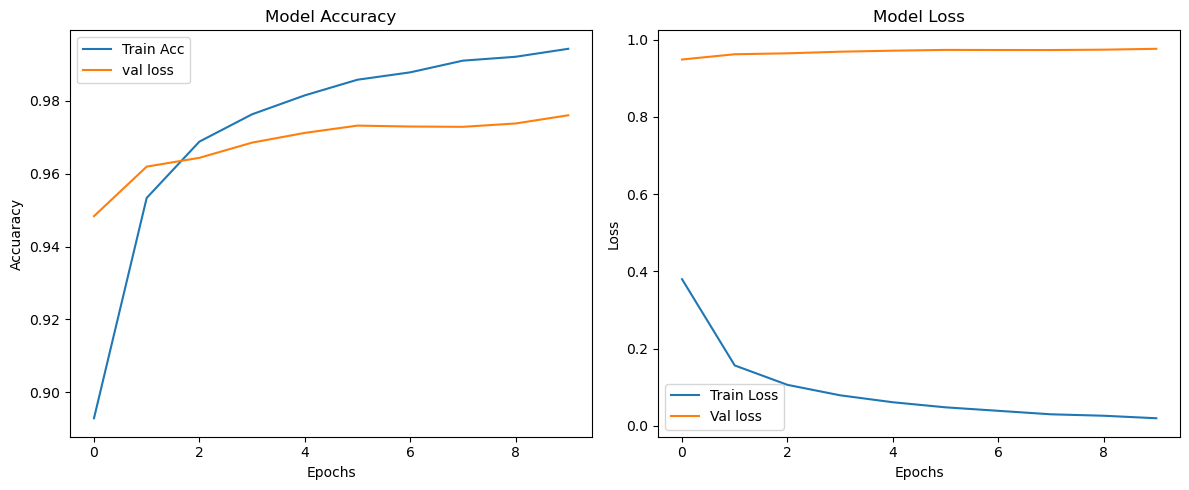

In [25]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = mnist.load_data()

#normalize images
x_train = x_train/255.0
x_test = x_test/255.0

#one hot encoode labels
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

#build model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

#compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

#train the model
history = model.fit(
    x_train,y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

#Accuracy plot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Acc')
plt.plot(history.history['val_accuracy'] ,label='val loss')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuaracy')
plt.legend()

#loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_accuracy'],label='Val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
           
